<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
## <font color='navy'> Introducción a Pandas
    
### <font color='navy'> Portafolios de Inversión

    Mtro. Sean Nicolás González Vázquez
    

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" width="400px" height="400px" />

> El verdadero poder de python viene con sus librerías. Ya en cursos pasados han aprendido varios aspectos relativos a las librerías ([NumPy](https://www.numpy.org/) y [matplotlib](https://matplotlib.org/)). En estos enlaces pueden encontrar la documentación oficial para revisar qué más pueden hacer con estas librerías. También el `help` puede ser un buen punto de partida para conocer qué más cosas pueden realizar.

> Hoy nos dedicaremos a estudiar la librería de Python para análisis de datos: **Pandas**. Durante el transcurso de la asignatura haremos uso extensivo de datos históricos de precios y rendimientos de activos financieros, por tanto es importante tener un manejo básico de pandas.

Referencias:
- https://pandas.pydata.org/
- https://towardsdatascience.com/data-science-with-python-intro-to-loading-and-subsetting-data-with-pandas-9f26895ddd7f
___


# 0. Motivación

En finanzas, normalmente trabajamos con grandes cantidades de datos (precios, rendimientos y fundamentales). 

Los datos que debemos cargar pueden guardarse de muchas maneras distintas: archivos CSV, archivos de Excel, etcétera. Incluso, los datos pueden estar disponibles a través de API's (Application Programming Interface). 

Para trabajar con datos, se hace necesario representarlos en una estructura tabular (cualquier cosa con forma de tabla con filas y columnas).

En algunos casos, los datos ya están en forma tabular y es más fácil cargarlos. En otros, debemos trabajar con datos no estructurados o que no están organizados de una manera determinada (texto plano, imágenes, audio, etcétera).

En esta clase nos vamos a concentrar en cargar datos desde archivos xlsx y desde la API de Yahoo Finance.

## Pandas

Pandas es una librería de código abierto para el lenguaje de programación Python, desarrollada por Wes McKinney. Es una librería muy eficiente y proporciona estructuras de datos y herramientas de análisis muy fáciles de usar.

Como las librerías que hemos visto antes, Pandas viene instalado por defecto con Anaconda, así que lo único que tenemos que hacer para empezar a trabajar con ella es importarla. La comunidad utiliza normalmente la abreviación pd para referirse a pandas:

In [12]:
# Importar pandas
import pandas as pd

Los **pd.DataFrames** son los objetos por excelencia de pandas para manipular datos. Son eficientes y rápidos. Son la estructura de datos donde pandas carga los diferentes formatos de datos: cuando nuestros datos están limpios y estructurados, cada fila representa una observación, y cada columna una variable o característica. Tanto las filas como las columnas pueden tener etiquetas.

En esta clase vamos a trabajar con datos pertenecientes a ejemplos de la librería featuretools [en esta página](https://www.featuretools.com/). Sin embargo para entender cómo es que se cargan estos datos, estos están disponibles en CANVAS en formato xlsx.

En esta clase, además de importar datos, aprenderemos a:
- seleccionar subconjuntos de datos;
- filtrar variables por categorías;
- entre otros.

Comenzamos:

___
# 1. Importando datos

En CANVAS, podrán encontrar el archivo "customers_data.xlsx" que cuenta con la información de los clientes de cierta empresa.

El primer paso para comenzar a trabajar con datos es importarlos. Lo podemos hacer con la función `pd.read_excel()`, ya que es un archivo .xlsx, en caso de necesitar exportar un archivo separado por comas (.csv) se puede utilizar la función `pd.read_csv()`:

Muy bien, concentrémonos en los datos de cliente:

In [ ]:
# Importar customers_data.xlsx
data = pd.read_excel('customers_data.xlsx')

In [ ]:
# Observar datos
data

,Unnamed: 0,customer,zip_code,join_date,date_of_birth
0,0,Pedro,60091,2011-04-17 10:48:00,1994-07-18
1,1,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
2,2,Luis,13244,2011-08-13 15:42:00,2012-11-21
3,3,Cesar,60091,2011-04-08 20:08:00,2010-08-15
4,4,Pablo,60091,2010-07-17 05:27:00,1984-07-28


Bien, ya tenemos los datos cargados, sin embargo, se ve algo raro. 

¿Qué es esta columna "Unnamed: 0"?

Para especificar que esta columna corresponde al índice, podemos usar el argumento `index_col`, o bien, la función `set_index`, debido a que los datos ya fueron exportados.

In [15]:
# Importar customers_data.xlsx, haciendo uso del argumento index_col
pd.read_excel('customers_data.xlsx', index_col=0)

,customer,zip_code,join_date,date_of_birth
0,Pedro,60091,2011-04-17 10:48:00,1994-07-18
1,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
2,Luis,13244,2011-08-13 15:42:00,2012-11-21
3,Cesar,60091,2011-04-08 20:08:00,2010-08-15
4,Pablo,60091,2010-07-17 05:27:00,1984-07-28


In [16]:
# Utilizar set_index, tener cuidado
data.set_index('Unnamed: 0', inplace=True)

In [17]:
# Ver data
data

,customer,zip_code,join_date,date_of_birth
Unnamed: 0,,,,
0,Pedro,60091,2011-04-17 10:48:00,1994-07-18
1,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
2,Luis,13244,2011-08-13 15:42:00,2012-11-21
3,Cesar,60091,2011-04-08 20:08:00,2010-08-15
4,Pablo,60091,2010-07-17 05:27:00,1984-07-28


In [18]:
# Tipo de objeto con que importa pandas los archivos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer       5 non-null      object        
 1   zip_code       5 non-null      int64         
 2   join_date      5 non-null      datetime64[ns]
 3   date_of_birth  5 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 200.0+ bytes


___
# 2. Indización y selección de datos

Hay muchas formas de las cuales podemos seleccionar datos de DataFrames. Veremos, la forma basada en corchetes ([]) y en los métodos `loc()` y `iloc()`.

Con los corchetes, podemos seleccionar ciertas filas, o bien, ciertas columnas. 

Para una selección de filas, podemos usar el indizado como en las listas: `[start_index:end_index]`, recordando que el `end_index` no es inclusivo.

Por ejemplo, con corchetes, podemos seleccionar los clientes en las primeras dos filas:

In [19]:
#Iloc sirve para posiciones
#[filas, columnas]

data.iloc[:2]

,customer,zip_code,join_date,date_of_birth
Unnamed: 0,,,,
0,Pedro,60091,2011-04-17 10:48:00,1994-07-18
1,Alfonso,13244,2012-04-15 23:31:00,1986-08-18


Ahora, seleccionar del tercer cliente en adelante:

In [20]:
data.iloc[2:]

,customer,zip_code,join_date,date_of_birth
Unnamed: 0,,,,
2,Luis,13244,2011-08-13 15:42:00,2012-11-21
3,Cesar,60091,2011-04-08 20:08:00,2010-08-15
4,Pablo,60091,2010-07-17 05:27:00,1984-07-28


Similarmente, para una selección de columnas, podemos usar una lista con los nombres de las columnas requeridas. Si pasamos solo una columna como un string en lugar de una lista, el resultado será un objeto **pd.Series**:

In [21]:
# Seleccionar la columna date_of_birth como Series
data['date_of_birth']

Unnamed: 0
0   1994-07-18
1   1986-08-18
2   2012-11-21
3   2010-08-15
4   1984-07-28
Name: date_of_birth, dtype: datetime64[ns]

In [22]:
# Tipo de objeto pd.Series
type(data['date_of_birth'])

pandas.core.series.Series

Las Series de pandas son arreglos unidimensionales que pueden ser etiquetados. En algunos casos, querremos seleccionar solo una columna pero mantener esta selección en un DataFrame. En este caso podemos pasar una lista con un solo elemento:

In [23]:
# Seleccionar la columna date_of_birth como DataFrame
data[['date_of_birth']]

,date_of_birth
Unnamed: 0,
0,1994-07-18
1,1986-08-18
2,2012-11-21
3,2010-08-15
4,1984-07-28


In [24]:
# Tipo de objeto pd.DataFrame
type(data[['date_of_birth']])

pandas.core.frame.DataFrame

Finalmente, seleccionamos dos columnas:

In [25]:
# Seleccionar las columnas date_of_birth y zip_code
data[['date_of_birth','zip_code']]

,date_of_birth,zip_code
Unnamed: 0,,
0,1994-07-18,60091
1,1986-08-18,13244
2,2012-11-21,13244
3,2010-08-15,60091
4,1984-07-28,60091


Muy bien, ya vimos que los corchetes son útiles. También existen los poderosos métodos `loc` y `iloc`, que nos dan el poder de seleccionar ambos a la vez: columnas y filas.

¿En qué se diferencian?

- El método `loc` nos permite seleccionar filas y columnas de nuestros datos basados en etiquetas. Primero, se deben especificar las etiquetas de las filas, y luego las de las columnas.

- El método `iloc` nos permite hacer lo mismo pero basado en índices enteros de nuestro DataFrame (como si fueran matrices).

Como antes, si queremos seleccionar todas las filas, o columnas, simplemente escribimos `:` en el lugar adecuado.

Mejor con ejemplos:

Para un mejor entendimiento de esta parte, reetiquetaremos la numeración de clientes con una "numeración" alfabética. Es decir: 1 = A, 2 = B, ..., 5 = E.

In [26]:
# Utilizar data.index
data.index = ['A', 'B', 'C', 'D', 'E']

In [27]:
# Observar datos
data

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18
B,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
C,Luis,13244,2011-08-13 15:42:00,2012-11-21
D,Cesar,60091,2011-04-08 20:08:00,2010-08-15
E,Pablo,60091,2010-07-17 05:27:00,1984-07-28


Ahora sí.

Seleccionemos el primer cliente con ambos métodos:

In [28]:
# Primer cliente con loc como serie
data.loc['A']

customer                       Pedro
zip_code                       60091
join_date        2011-04-17 10:48:00
date_of_birth    1994-07-18 00:00:00
Name: A, dtype: object

In [29]:
# Primer cliente con iloc como data frame
data.iloc[[0]]

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18


Ahora, seleccionemos los clientes A y C con ambos métodos (.loc y .iloc):

In [30]:
# Clientes A y C con loc
data.loc[['A','C']]

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18
C,Luis,13244,2011-08-13 15:42:00,2012-11-21


In [31]:
# Clientes A y C con iloc
data.iloc[[0,2]]

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18
C,Luis,13244,2011-08-13 15:42:00,2012-11-21


Ahora, de los clientes B y E, queremos su zip_code y su join_date:

In [32]:
# loc
data.loc[['B','E'],['zip_code', 'join_date']]

,zip_code,join_date
B,13244,2012-04-15 23:31:00
E,60091,2010-07-17 05:27:00


In [33]:
# iloc
data.iloc[[1,4],[1,2]]

,zip_code,join_date
B,13244,2012-04-15 23:31:00
E,60091,2010-07-17 05:27:00


Ahora, queremos solo zip_code y join_date, pero de todos los clientes:

In [34]:
# loc
data.loc[:,['zip_code', 'join_date']]

,zip_code,join_date
A,60091,2011-04-17 10:48:00
B,13244,2012-04-15 23:31:00
C,13244,2011-08-13 15:42:00
D,60091,2011-04-08 20:08:00
E,60091,2010-07-17 05:27:00


In [35]:
# iloc
data.iloc[:,[1,2]]

,zip_code,join_date
A,60091,2011-04-17 10:48:00
B,13244,2012-04-15 23:31:00
C,13244,2011-08-13 15:42:00
D,60091,2011-04-08 20:08:00
E,60091,2010-07-17 05:27:00


¿Qué tal? Ya tenemos varias formas de seleccionar e indexar ciertos datos.

Esto es, sin duda, muy útil. Por otra parte, muchas veces queremos obtener cierta información (clientes, en nuestro ejemplo) que cumplan algunos requisitos. Por ejemplo:
- que sean mayores de 18 años, o
- que su antiguedad en la plataforma sea menor a seis meses, o
- que residan en cierta zona,
- entre otros.

Para ello utilizamos los operadores de comparación (==, >, <, >=, <=, !=).

___
# 3. Filtrado de datos

Los operadores de comparación pueden ser utilizados con Series de pandas. 

Esto resulta ser súper útil para filtrar datos con ciertas condiciones específicas (esto lo veremos enseguida). 

Por ahora, veremos que al usar operadores de comparación con Series, el resultado será Series booleanas. Es decir, cada elemento de dichas series será `True` si la condición se satisface, y `Falso` de lo contrario.

Una vez tenemos la serie boolena, podemos aplicarla para la selección de filas, obteniendo un DataFrame filtrado como resultado.

**Ejemplos**

¿Cuáles clientes son mayores de 18 años?

In [36]:
# Ver tabla
data

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18
B,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
C,Luis,13244,2011-08-13 15:42:00,2012-11-21
D,Cesar,60091,2011-04-08 20:08:00,2010-08-15
E,Pablo,60091,2010-07-17 05:27:00,1984-07-28


In [37]:
# Cuales son mayores de edad?
data['date_of_birth']<'2007-08-20'

A     True
B     True
C    False
D    False
E     True
Name: date_of_birth, dtype: bool

In [38]:
# Filtrar data frame
data[data['date_of_birth']<'2007-08-20']

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18
B,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
E,Pablo,60091,2010-07-17 05:27:00,1984-07-28


¿Cuáles clientes se registraron después del primero de Junio del 2011?

In [39]:
# Ver verdadero o falso


In [40]:
# Filtrar data frame


¿Cuáles clientes viven en la zona con CP 13244?

In [41]:
# Zone True or False


In [42]:
# Filtrar data frame


**¡Excelente!**

Los filtrados que acabamos de hacer fueron de una sola condición. Ahora, ¿cómo hacer filtrados con múltiples condiciones?

## 3.1 Filtrado con múltiples condiciones

Cuando queremos filtrar datos con múltiples condiciones, podemos usar operadores booleanos (`and`, `or`, `not`), solo con una pequeña modificación. Usamos:

- `&` en lugar de `and`,
- `|` en lugar de `or`, y
- `~` en lugar de `not`.

**Ejemplos**

Obtener la información de los clientes adultos que vivan en la zona con código postal 13244

In [43]:
data[(data['date_of_birth']<'2007-08-20') & (data['zip_code']==13244)]

,customer,zip_code,join_date,date_of_birth
B,Alfonso,13244,2012-04-15 23:31:00,1986-08-18


Obtener la información de los clientes que sean adultos o que se hayan registrado luego del 6 de Junio del 2011

In [44]:
data[(data['date_of_birth']<'2007-08-20') | (data['join_date']>'2011-06-06')]

,customer,zip_code,join_date,date_of_birth
A,Pedro,60091,2011-04-17 10:48:00,1994-07-18
B,Alfonso,13244,2012-04-15 23:31:00,1986-08-18
C,Luis,13244,2011-08-13 15:42:00,2012-11-21
E,Pablo,60091,2010-07-17 05:27:00,1984-07-28


# 4.- Importación de Datos desde Yahoo Finance

La librería de Yahoo Finance `yfinance`, nos permite descargar directamente datos desde la base de datos de Yahoo Finance, la documentación de la paquetería es la siguiente:

+ https://pypi.org/project/yfinance/

Para instalar la librería desde tu computadora utiliza el comando:

`!pip install yfinance`

In [45]:
# Importar y/o instalar yfinance
import yfinance as yf

Con el método de `yf.download`, podemos descargar la información de cualquier activo financiero que cotice en la bolsa de Estados Unidos (**NYSE**), utilizando el *Ticker* del activo, vamos a intentarlo para una acción:

In [46]:
# Descargar información para un activo y guardar en variable "price"
aapl = yf.download('AAPL',start='2020-01-01', end='2025-08-01')['Close']
aapl

C:\Users\samue\AppData\Local\Temp\ipykernel_16084\703121748.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL',start='2020-01-01', end='2025-08-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-02,72.538521
2020-01-03,71.833290
2020-01-06,72.405670
2020-01-07,72.065140
2020-01-08,73.224426
...,...
2025-07-25,213.637543
2025-07-28,213.807358
2025-07-29,211.030502


Notesé que la función descarga distinta información de los activos, como por ejemplo el Low, Close, Adj Close, etc. 

Vamos a analizar cada elemento para discutir cual es el más importante, a posteriori, vamos a filtrar el data frame por esta columna.

In [47]:
# Filtrar price por la columna más importante

También podemos intentarlo para *n* cantidad de activos, además de la acción descargada en la parte anterior, vamos a descargar ahora la información de JP Morgan `JPM` y del índice Dow Jones `^DJI`, y filtrando por la columna determinada en la parte anterior.

In [48]:
# Descargar la información para la acción anterior, JPM y DJI.
aapl = yf.download(['AAPL.MX','CEMEXCPO.MX'],start='2020-01-01', end='2025-08-01')['Close']
aapl

C:\Users\samue\AppData\Local\Temp\ipykernel_16084\3696848983.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download(['AAPL.MX','CEMEXCPO.MX'],start='2020-01-01', end='2025-08-01')['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL.MX,CEMEXCPO.MX
Date,,
2020-01-02,1408.843750,7.130874
2020-01-03,1407.521362,7.160752
2020-01-06,1412.699707,7.170711
2020-01-07,1410.700684,7.041240
2020-01-08,1422.654785,7.170711
...,...,...
2025-07-25,3965.748047,15.540000
2025-07-28,4012.565430,15.740000
2025-07-29,3966.798096,16.170000


Ahora, si queremos graficar la información con los precios de cierre ajustado para nuestras tres acciones, vamos a utilizar `matplotlib.pyplot`:

In [ ]:
# Graficar precios usando matplotlib

import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

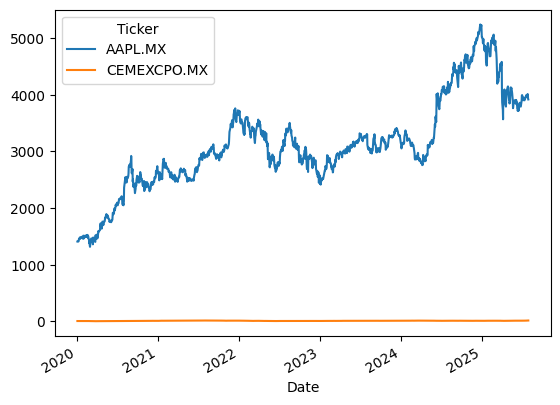

In [51]:
aapl.plot()

<Axes: xlabel='Date'>

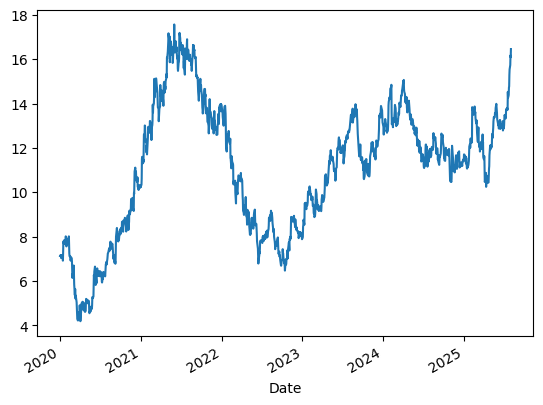

In [52]:
aapl['CEMEXCPO.MX'].plot()

Como pueden observar, el Dow Jones se encuentra en una escala de precios muy por encima del resto de las acciones, hay que reflexionar: ¿A qué se debe esto? ¿Es útil comparar los precios de un activo financiero para decidir si invertir o no en este?

Para observar la escala de nuestras otras dos acciones, grafiquemos filtrando estas.

In [ ]:
# Filtrar precios quitando el Dow Jones


In [ ]:
# Graficar precios usando matplotlib




> **Útil, ¿no?**.  Como habrán notado, la librería pandas es una herramienta extremadamente poderosa, no solo para el análisis de datos en Python, sino también para la manipulación y análisis de datos financieros. Durante el curso, utilizaremos esta librería para almacenar información sobre activos financieros, como precios, rendimientos, métricas de desempeño y más.

> En los últimos cinco años, la programación y las matemáticas han adquirido un papel crucial en las finanzas. De hecho, el **CFA Institute**, la organización de finanzas más prestigiosa a nivel mundial, ha incorporado temas de programación en Python y Ciencia de Datos en su certificación. Además, numerosas empresas bursátiles han comenzado a adoptar Python como el lenguaje preferido para el desarrollo de aplicaciones financieras. Esto subraya la importancia de comprender y dominar Python en el campo de la Ingeniería Financiera.